# This Notebook generates the results for ROLLO multi-objective hyperparameter search using the binh and korn function. 

In [1]:
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt
import numpy as np 
import pickle
from numpy import pi
import operator
import pandas as pd
import statistics
import deap.benchmarks.tools as bt

creator.create("obj", base.Fitness, weights=(-1.0,-1.0))
creator.create("Ind", list, fitness=creator.obj)
toolbox = base.Toolbox()

In [2]:
def load_cp(name):
    with open(name, "rb") as cp_file:
        cp = pickle.load(cp_file)
    return cp 

In [3]:
def cp_hyp_div(cp, ref):
    results = cp['all']
    final_pop = results["populations"][-1]
    non_dom = tools.sortNondominated(final_pop, k=len(final_pop), first_front_only=True)[0]
    hypervol = bt.hypervolume(non_dom, ref)
    diversity = bt.diversity(non_dom, [120, 0], [0, 50])
    return hypervol, diversity

In [4]:
def cp_hyp_div_list(case, num):
    ref = np.array([120,50])
    hyp_list, div_list = [], []
    for i in range(1,num):
        cp = load_cp("checkpoint_"+case+"_"+str(i)+".pkl")
        hyp, div = cp_hyp_div(cp, ref)
        hyp_list.append(hyp)
        div_list.append(div)
    return np.array(hyp_list), np.array(div_list)

In [5]:
hyp_list_60_10, div_list_60_10 = cp_hyp_div_list("60_10", 50)
hyp_list_75_8, div_list_75_8 = cp_hyp_div_list("75_8", 50)
hyp_list_100_6, div_list_100_6 = cp_hyp_div_list("100_6", 25)
hyp_list_120_5, div_list_120_5 = cp_hyp_div_list("120_5", 25)
hyp_list_150_4, div_list_150_4 = cp_hyp_div_list("150_4", 13)

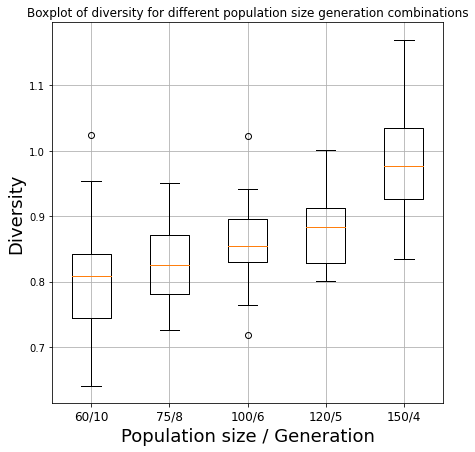

In [6]:
fig, ax = plt.subplots(figsize=(7,7))
ax.boxplot([div_list_60_10, div_list_75_8, div_list_100_6, div_list_120_5, div_list_150_4])
ax.set_xticklabels(["60/10", "75/8", "100/6", "120/5", "150/4"], fontsize=12)
ax.set_xlabel("Population size / Generation", fontsize=18)
ax.set_ylabel("Diversity", fontsize=18)
ax.set_title("Boxplot of diversity for different population size generation combinations")
ax.grid()

4287.535516789984 4296.102018069088 4300.7349101545915 4305.505203157509 4299.370122361055


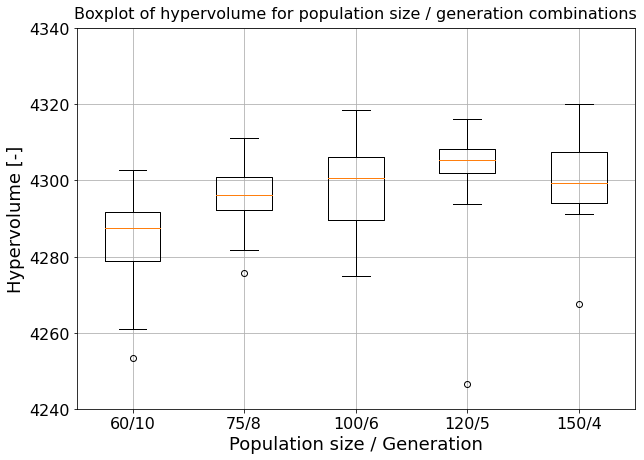

In [7]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.boxplot([hyp_list_60_10, hyp_list_75_8, hyp_list_100_6, hyp_list_120_5, hyp_list_150_4])
ax.set_xticklabels(["60/10", "75/8", "100/6", "120/5", "150/4"])
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel("Hypervolume [-]", fontsize=18)
ax.set_xlabel("Population size / Generation", fontsize=18)
ax.grid()
ax.set_ylim(4240, 4340)
ax.set_title("Boxplot of hypervolume for population size / generation combinations", fontsize=16, pad=10)
print(statistics.median(hyp_list_60_10), statistics.median(hyp_list_75_8), statistics.median(hyp_list_100_6), statistics.median(hyp_list_120_5), statistics.median(hyp_list_150_4))
plt.savefig("hypervolume-comparison-gens.png", bbox_inches="tight")

In [8]:
hyp_list_120_5_cxpb_09, div_list_120_5_cxpb_09 = cp_hyp_div_list("120_5_cxpb_0.9", 25)
hyp_list_120_5_cxpb_075, div_list_120_5_cxpb_075 = cp_hyp_div_list("120_5_cxpb_0.75", 25)

4305.505203157509 4319.189754423708


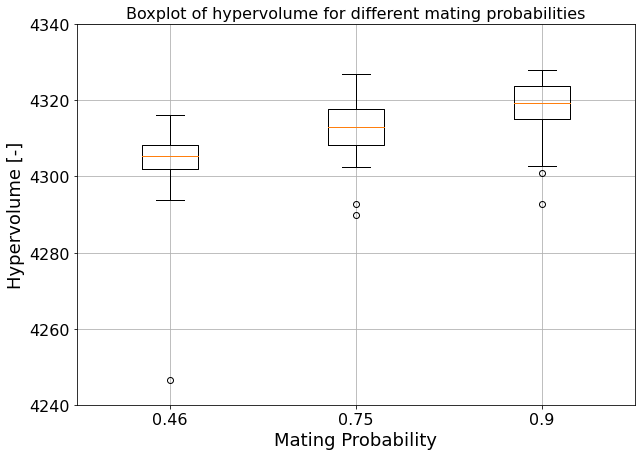

In [9]:
fig, ax = plt.subplots(figsize=(10,7))
ax.boxplot([hyp_list_120_5, hyp_list_120_5_cxpb_075, hyp_list_120_5_cxpb_09])
ax.set_xticklabels([0.46, 0.75, 0.90])
ax.set_xlabel("Mating Probability", fontsize=18)
ax.set_ylabel("Hypervolume [-]", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid()
ax.set_ylim(4240, 4340)
ax.set_title("Boxplot of hypervolume for different mating probabilities", fontsize=16)
print( statistics.median(hyp_list_120_5), statistics.median(hyp_list_120_5_cxpb_09))
plt.savefig("hypervolume-comparison-matpb.png", bbox_inches="tight")

In [10]:
hyp_list_120_5_cxpb_09_mutpb_01, div_list_120_5_cxpb_09_mutpb_01 = cp_hyp_div_list("120_5_cxpb_0.90_mutpb_0.1", 25)
hyp_list_120_5_cxpb_09_mutpb_03, div_list_120_5_cxpb_09_mutpb_03 = cp_hyp_div_list("120_5_cxpb_0.90_mutpb_0.3", 25)

4305.505203157509 4319.189754423708


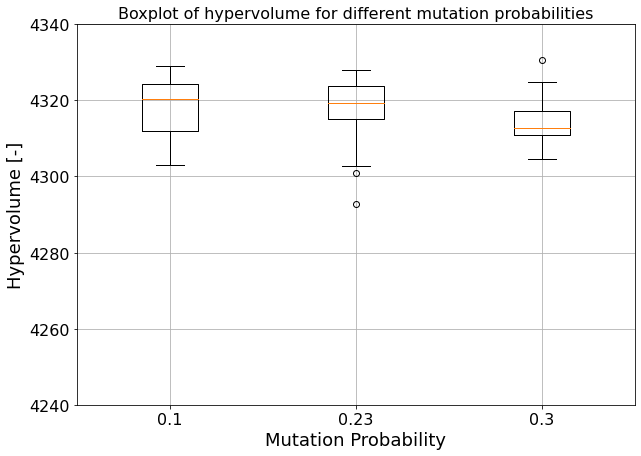

In [11]:
fig, ax = plt.subplots(figsize=(10,7))
ax.boxplot([hyp_list_120_5_cxpb_09_mutpb_01, hyp_list_120_5_cxpb_09, hyp_list_120_5_cxpb_09_mutpb_03])
ax.set_xticklabels([0.1, 0.23, 0.3])
ax.set_xlabel("Mutation Probability", fontsize=18)
ax.set_ylabel("Hypervolume [-]", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid()
ax.set_ylim(4240, 4340)
ax.set_title("Boxplot of hypervolume for different mutation probabilities", fontsize=16)
print( statistics.median(hyp_list_120_5), statistics.median(hyp_list_120_5_cxpb_09))
plt.savefig("hypervolume-comparison-mutpb.png", bbox_inches="tight")

0.05 4296.8472046025945 0.8537086341027714
0.1 4303.406152968857 0.94362556598856
0.15 4295.838081477962 0.8384984229601803
0.2 4298.278630787141 0.8977869420148061
0.25 4306.871440156492 0.8168835659736792
0.3 4312.446565707325 0.8570430092390525


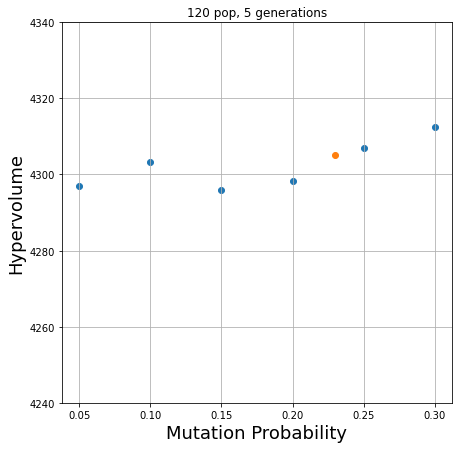

In [12]:
muts = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
# 0.23 -> 4305 
hyp_vals, div_vals = [], []
ref = np.array([120,50])
for m in muts:
    cp = load_cp("checkpoint_120_5_mutpb_"+str(m)+".pkl")
    hyp, div = cp_hyp_div(cp, ref)
    hyp_vals.append(hyp)
    div_vals.append(div)
    print(m, hyp, div)
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(muts, hyp_vals)
ax.scatter(0.23, 4305)
ax.set_ylim(4240, 4340)
ax.set_ylabel("Hypervolume", fontsize=18)
ax.set_xlabel("Mutation Probability", fontsize=18)
ax.set_title("120 pop, 5 generations")
ax.grid()

0.1 4282.248533043542 1.1979875813834646
0.2 4282.110036104193 1.0434556780416322
0.3 4276.361196548645 1.0549083907269694
0.4 4314.3389322572575 0.9732917380150038
0.5 4303.384985072349 0.8695111939489972
0.6 4321.6028179277755 0.7773877637517438
0.7 4320.143091534151 0.7924138539867996
0.8 4299.50670895823 0.8208477855161492
0.9 4331.921671775248 0.7249240073501318


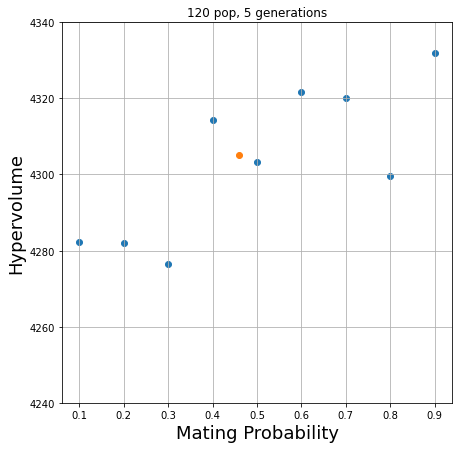

In [13]:
cx = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
ref = np.array([120,50])
# 0.46 -> 4305 
hyp_vals, div_vals = [], []
for c in cx:
    cp = load_cp("checkpoint_120_5_cxpb_"+str(c)+".pkl")
    hyp, div = cp_hyp_div(cp, ref)
    hyp_vals.append(hyp)
    div_vals.append(div)
    print(c, hyp, div)
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(cx, hyp_vals)
ax.scatter(0.46, 4305)
ax.set_ylim(4240, 4340)
ax.set_ylabel("Hypervolume", fontsize=18)
ax.set_xlabel("Mating Probability", fontsize=18)
ax.set_title("120 pop, 5 generations")
ax.grid()

In [14]:
# the mut variation, barely impacts hypervolume 
# higher cx pb results in higher hypervolume (maybe should use 0.9)

In [15]:
# compare when use weights and when not 

In [16]:
ref = np.array([140/1000,50])
cp_weights_used = load_cp("checkpoint_120_50_divf11000_weights_1_0.001.pkl")
cp_weights_notused = load_cp("checkpoint_120_50_divf11000_weights_1_1.pkl")
def cp_hyp_div2(cp, ref):
    results = cp['all']
    final_pop = results["populations"][-1]
    for ind in final_pop:
        ind.fitness.values = (ind.fitness.values[0], ind.fitness.values[1]*1000)
    non_dom = tools.sortNondominated(final_pop, k=len(final_pop), first_front_only=True)[0]
    hypervol = bt.hypervolume(non_dom, ref)
    diversity = bt.diversity(non_dom, [120, 0], [0, 50])
    return hypervol, diversity
print(cp_hyp_div2(cp_weights_used, ref))
print(cp_hyp_div(cp_weights_notused, ref))

(5.187692192525466, 0.9033544150556264)
(5.209813633102749, 0.8611162240295521)


In [17]:
# weights dont improve the results. Let's not use it. 

4299.82065247481 0.7511284242972944


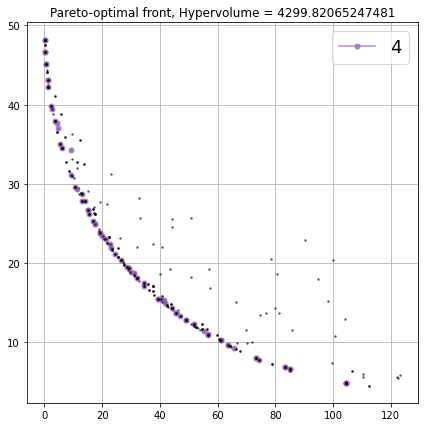

In [18]:
# one example Pareto front 
cp = load_cp("checkpoint_75_8_4.pkl")
results = cp['all']
ref = np.array([120,50])
hyp, div = cp_hyp_div(cp, ref)
print(hyp, div)
fig, ax = plt.subplots(figsize=(7,7))
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan", "tab:blue","tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]
for i, pop in enumerate(results["populations"]):
    for ind in pop:
        ax.plot(ind.fitness.values[0], ind.fitness.values[1], 'k.', ms=3, alpha=0.5)
    non_dom = tools.sortNondominated(pop, k=len(pop), first_front_only=True)[0]
    for j, ind in enumerate(non_dom):
        if i == 4:
            if j == 0:
                ax.plot(ind.fitness.values[0], ind.fitness.values[1], color= colors[i], marker='o', alpha=0.74, ms=5, label=i)
            else:
                ax.plot(ind.fitness.values[0], ind.fitness.values[1], color= colors[i], marker='o', alpha=0.74, ms=5)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=18, bbox_to_anchor = [1.0, 1.0])
ax.set_title('Pareto-optimal front, Hypervolume = '+str(hyp))
ax.grid()
#ax.set_ylim(0, 50)
#ax.set_xlim(0, 140/1000)